In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.dates as md
import matplotlib.pyplot as plt
%matplotlib inline

dt.datetime.today().strftime("%Y-%m-%d-%H-%M-%S")


'2015-05-02-21-16-51'

In [2]:
t_step = int((1./200000)*1e9)
dates = pd.DatetimeIndex(start=dt.datetime.today(), periods=10, freq=pd.offsets.Nano(t_step))
# matplotlib.dates.date2num(dates)

In [3]:
data = np.random.randn(10, 4)
data[:,0]+=4
data[:,1]+=6
data[:,2]+=8
data[:,3]+=10

df = pd.DataFrame(data, index=dates, columns=['Channel', 'Current', 'R', 'G'])

NameError: name 'plt_data' is not defined

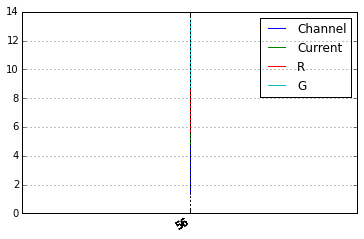

In [4]:
plt.figure()
df=df.ix[dates[0]:dates[9]]
df.plot()
ax = plt.gca()

ax.set_xticks(dates)

xfmt = md.DateFormatter('%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,plt_data, "o-")
plt.show()


In [5]:
t_step = int((1./200000)*1e9)
a = pd.DatetimeIndex(start=dt.datetime.today(), periods=10, freq=pd.offsets.Nano(t_step))

In [6]:
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-05-02 21:16:56.522870, ..., 2015-05-02 21:16:56.522915]
Length: 10, Freq: 5000N, Timezone: None

In [11]:
one_s = dt.timedelta(0,1)

In [35]:
acq_rate = 50000   # samples / second
av_size = 1000
num_chans = 2
data_rate = (acq_rate/av_size/num_chans) # saved samples/second
print data_rate
c_time = pd.to_datetime(dt.datetime.today())
# pd.to_datetime(dt.datetime.today())
ts = pd.to_datetime(np.array(range(0,acq_rate,acq_rate/10))/acq_rate, unit='s')
np.ones(10)
df = pd.DataFrame(np.random.rand(10,10), index=ts)
dr = pd.date_range(c_time, c_time+one_s, freq='%dL' %(1000/data_rate))
print dr
# print dr[0]
# print dr[1]
# c_time =  pd.to_datetime(dt.datetime.today())
# ts = pd.date_range(c_time, c_time+one_s, freq='%dN' %(10-1))
# print df.set_index(ts)
# print ts

25
<class 'pandas.tseries.index.DatetimeIndex'>
[2015-05-02 22:55:09.007367, ..., 2015-05-02 22:55:10.007367]
Length: 26, Freq: 40L, Timezone: None


In [16]:

# c_time =  pd.to_datetime(dt.datetime.today())
# pd.date_range(c_time,c_time+one_s,periods=10)

In [135]:
import numpy as np

class IncBuffer(object):
    def __init__(self, no_rows, no_columns, dtype=float):
        """initialization"""
        self._no_columns = no_columns
        self._no_rows = no_rows
        self._no_extend = 10
        self._index = 0

        self._data = np.empty((self._no_rows, self._no_columns), dtype=dtype)
        self._data.fill(np.NAN)


    def append(self, value):
        """append an element"""
        if np.ndim(value) == 1:
            to = 1
#             self._data[self._index] = value
        else:
            value=np.array(value)
            to = self._index+value.shape[1]
            
        if self._index+to > self._no_rows:
            self.extend()
        self._data[self._index:self._index+to] = value
        
        self._index += to
    def extend(self):
        dt = np.empty((self._no_extend, self._no_columns), dtype=self._data.dtype)
        dt.fill(np.NAN)
        self._data = np.concat([self._data, dt])
        
    def get_all(self):
        """return a list of elements from the oldest to the newest"""
        return(self._data)

    def get_partial(self):
        return(self.get_all()[:self._index])

    def __getitem__(self, key):
        """get element"""
        return(self._data[-key])

    def __repr__(self):
        """return string representation"""
        s = '\nIncBuffer:'
        s = s + 'Size: ' + str(self._index) + '\n'
        s = s + self.get_partial().__repr__()
#         s = s + '\t' + self.get_partial()[::-1].__repr__()
        return(s)


In [136]:
p = IncBuffer(4,2)
print p.get_all()
p.append([[1,2],[9,2]])
p.append([3,2])
p.append([3,2])
p.append([3,2])
print p.get_all()
print p

[[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


AttributeError: 'module' object has no attribute 'concat'

In [117]:
p = np.empty((3,2))
p[:] = np.NAN
p[1] = np.array([[1,2], [2,3]])

print p

ValueError: could not broadcast input array from shape (2,2) into shape (2)

In [92]:
d = np.array([1,2])
d.ndim
d = ([[1,2],[3,4],[3,4]])
np.ndim(d)

2